In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP for text pre-processing
import nltk
import scipy
import re
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
tokenizer = ToktokTokenizer()

# other libraries
import gensim
from gensim.models import Word2Vec
import itertools
from sklearn.decomposition import PCA
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn.decomposition import PCA

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# remove warnings
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
data = pd.read_csv('data/flipkart_com-ecommerce_sample.csv')
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [4]:
data.shape

(20000, 15)

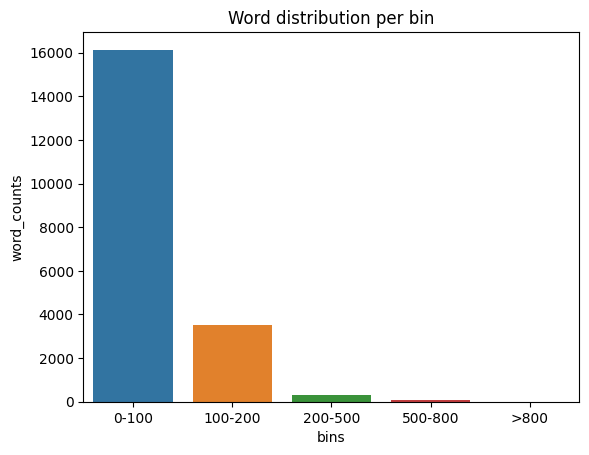

In [5]:
# Let's add a new length column to give the total length of the 'description' input variable.

data['length'] = data['description'].str.len()

# Add a new column for the number of words in the description before text preprocessing.

data['no_of_words'] = data['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)

#The following is the word count distribution for 'description'.

bins = [0, 100, 300, 500, 800, np.inf]

labels = ['0-100', '100-200', '200-500', '500-800', '>800']

data['bins'] = pd.cut(data.no_of_words, bins=bins, labels=labels)

words_distribution = data.groupby('bins').size().reset_index(name='word_counts')

sns.barplot(x='bins', y='word_counts', data=words_distribution)

plt.title("Word distribution per bin")

plt.show()

Data Preprocessing

Data preprocessing includes data cleaning, preparation, transformation, and dimensionality reduction, which convert the raw data into a form that is suitable for further processing.

In [6]:
missing = pd.DataFrame(data.isnull().sum()).rename (columns = {0: 'missing' })

missing['percent'] = missing['missing'] /len(data)

missing.sort_values ('percent', ascending = False)

,missing,percent
brand,5864,0.29320
retail_price,78,0.00390
discounted_price,78,0.00390
product_specifications,14,0.00070
image,3,0.00015
bins,2,0.00010
no_of_words,2,0.00010
length,2,0.00010
description,2,0.00010
product_rating,0,0.00000


In [7]:
# Nearly, 30 percent brand values are missing, rest of the missing values are negligible

Text Preprocessing Pipeline

1. Converting data to lowercase.
2. Removing/Replacing Punctuations and Whitespaces.
3. Removing Stopwords.
4. Stemming and lemmatization.

In [8]:
# Remove punctuation
data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between terms with a single space
data['description'] = data['description'].str.replace(r'\s+',' ')

# Remove leading and trailing whitespace
data['description'] = data['description'].str.replace(r'^\s+|\s+?$','')

# converting to lower case
data['description'] = data['description'].str.lower()

data['description'].head()

0    key features of alisha solid women's cycling s...
1    fabhomedecor fabric double sofa bed (finish co...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women's cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

In [9]:
# Removing Stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Yash
[nltk_data]     Phatak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re
pattern = r'\b(?:{})\b'.format('|'.join(stop))
data['description'] = data['description'].str.replace(pattern, '')

# Removing single characters
data['description'] = data['description'].str.replace(r'\s+', ' ')
data['description'] = data['description'].apply(lambda x: " ".join([word for word in str(x).split() if len(word) > 1]))

# Removing domain related stop words from description
specific_stop_words = ["rs", "flipkart", "buy", "com", "free", "day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery", "products", "product", "shipping", "online", "india", "shop"]
data['description'] = data['description'].apply(lambda x: " ".join(word for word in str(x).split() if word not in specific_stop_words))
data['description'].head()

0    features of alisha solid women's cycling short...
1    fabhomedecor fabric double sofa bed (finish co...
2    features of aw bellies sandals wedges heel cas...
3    features of alisha solid women's cycling short...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Phatak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


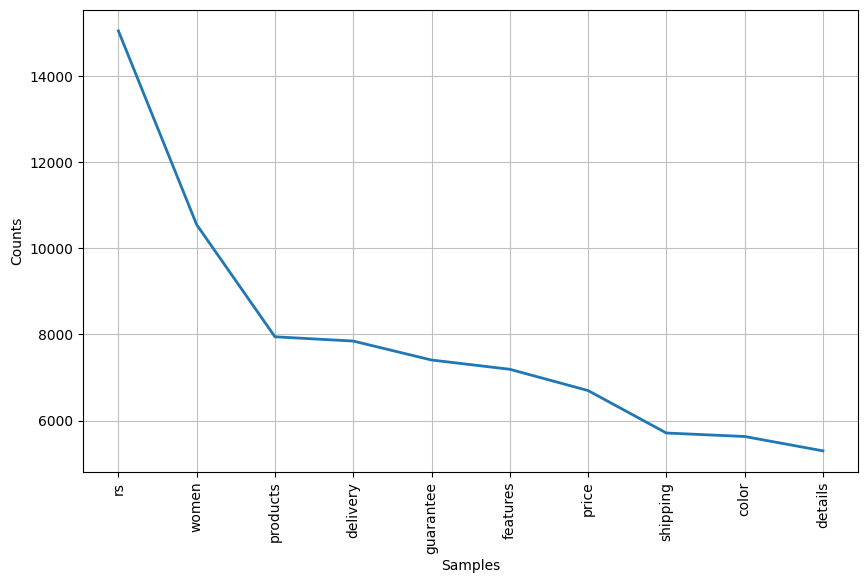

[('rs', 15045), ('women', 10547), ('products', 7945), ('delivery', 7846), ('guarantee', 7406), ('features', 7191), ('price', 6697), ('shipping', 5712), ('color', 5631), ('details', 5298)]


In [11]:
nltk.download('punkt')
# Top frequent words after removing domain related stop words
a = data['description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)

# Filter out non-alphabetic words and stopwords
words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word.lower() not in stopwords.words('english')]
word_dist = nltk.FreqDist(words)

# Plotting the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_dist.plot(10, cumulative=False)

# Displaying the most common words
print(word_dist.most_common(10))

Content based Recommendation Model

In [12]:
# text cleaning
data['description'] = data['description'].fillna('')
#define tfidf vectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
#get vectors
matrix = tfidf.fit_transform(data['description'])
#shape
matrix.shape

(20000, 26198)

In [13]:
# mapping the products with indices for cosine similarity
prod_index = pd.Series(data.index,index=data['product_name']).drop_duplicates()
prod_index

product_name
Alisha Solid Women's Cycling Shorts            0
FabHomeDecor Fabric Double Sofa Bed            1
AW Bellies                                     2
Alisha Solid Women's Cycling Shorts            3
Sicons All Purpose Arnica Dog Shampoo          4
                                           ...  
WallDesign Small Vinyl Sticker             19995
Wallmantra Large Vinyl Stickers Sticker    19996
Elite Collection Medium Acrylic Sticker    19997
Elite Collection Medium Acrylic Sticker    19998
Elite Collection Medium Acrylic Sticker    19999
Length: 20000, dtype: int64

Final Function
Index -> Cos Similarity -> Sorting -> Get top N -> Output

In [14]:
def predict_products(text):
    index = prod_index[text]
    score =  linear_kernel(matrix[index],matrix) # pairwise similarity scores
    matching_sc= list(enumerate (score[0]))

    # Sort the product based on the similarity scores
    matching_sc= sorted(matching_sc, key=lambda x: x[1], reverse=True)
    # Getting the scores of the 10 most similar product
    matching_sc= matching_sc[1:10]
    # Getting the product indices
    product_indices = [i[0] for i in matching_sc]
    # Show the similar products
    return data['product_name'].iloc[product_indices]

In [15]:
recommended_product  = predict_products(input("Enter a product name: "))
if recommended_product is not None:

    print ("Similar products")
    print("\n")
    for product_name in recommended_product:
        print(product_name)

KeyError: 'Shoes'

# Building a Product Search Engine

As we need to build a search engine that takes into account context based on the products and not just the string matched searches, we will be using the word2vec model for embeddings.

There are two ways of building embeddings:
1. CBOW - Takes each word's context as the input and predicts the word corresponding to the context. The input to the network is passed to the hidden layer with N neurons. Then, at the end the output layer predicts the word using the softmax layer.
2. Skip gram - Reverse of CBOW. The word is the input and the network predicts context.

In [ ]:
# Creating list containing description of each product as sublist

fin = []

for i in 